# Prosper Loan Data Exploration

## by Erik Sorensen

## Investigation Overview

The purpose of this exploration is to determine which variables from the [Prosper](https://www.prosper.com) loan dataset influence the annual percentage rate (APR) for a loan.

## Dataset Overview

The dataset is a collection of loan listings, with one entry per loan. 

Data include:
- loan status
- loan parameters (e.g. term, amount, interest rate, APR)
- borrower credit-related variables (e.g. employment, credit rating, credit accounts and balances, income, debt),
- Prosper's own risk score and loan rating
- investments in the loan

Primarily of interest are loan parameters, risk scores and borrrower credit-related variables.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
prosper2 = pd.read_csv('prosper2.csv')
display(prosper2.head())

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScoreAvg,NumLoans,LoanGT25k
0,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,...,0.0,0.0,1.0,0,0,0.0,1,689.5,None,No
1,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,...,0.0,0.0,1.0,0,0,0.0,158,809.5,None,No
2,4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,...,0.0,0.0,1.0,0,0,0.0,20,689.5,One,No
3,5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaN,0.15425,0.1314,...,0.0,0.0,1.0,0,0,0.0,1,749.5,None,No
4,6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaN,0.31032,0.2712,...,0.0,0.0,1.0,0,0,0.0,1,689.5,None,No


In [4]:
prosper2['BorrowerAPR'].describe()

count    76805.000000
mean         0.223398
std          0.079031
min          0.045830
25%          0.161570
50%          0.214740
75%          0.287800
max          0.423950
Name: BorrowerAPR, dtype: float64

## APR Characteristics

- APR ranges from 4.6-42.4%, with a median of 21.5%

- APR shows an approximately normal distribution, with a large peak near 35%

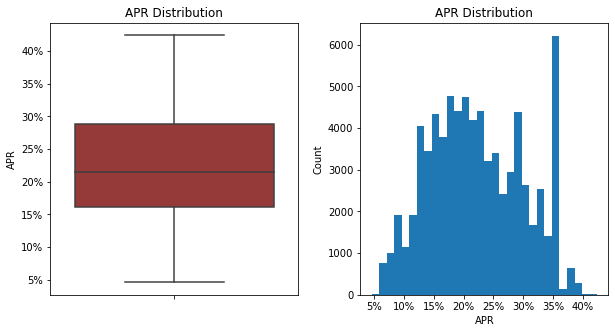

In [5]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.25)
plt.subplot(121)
new_tix = np.arange(0.05,0.45,0.05)
new_labs = ['{:.0f}%'.format(v) for v in 100*new_tix]
sb.boxplot(data=prosper2, y='BorrowerAPR', color='brown')
plt.ylabel('APR')
plt.yticks(new_tix, new_labs)
plt.title('APR Distribution')

plt.subplot(122)
plt.hist(data=prosper2, x='BorrowerAPR', bins=30)
plt.xlabel('APR')
plt.ylabel('Count')
plt.xticks(new_tix, new_labs)
plt.title('APR Distribution')
plt.show();

In [6]:
prosper2['ProsperRating (numeric)'].describe()

count    76805.000000
mean         4.138415
std          1.655619
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: ProsperRating (numeric), dtype: float64

## Loan Characteristics and APR

* Prosper loan rating was by far the most influential variable in determining APR
    - loan rating is comprised of the Prosper score (proprietary multivariate risk score) and credit score
    - loan rating ranges from 1-7 with higher rating associated with less risk
    - loan rating is approximately normally distributed, with a median of 4
    
* A higher loan rating was associated with a lower APR

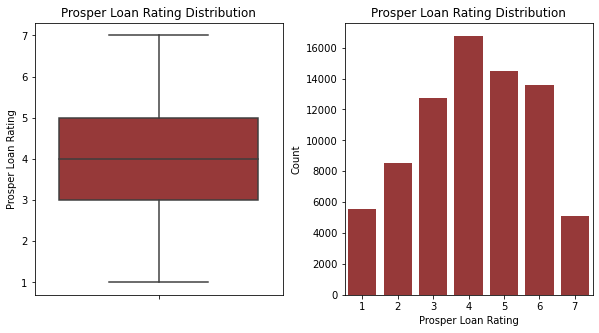

In [7]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.25)
plt.subplot(121)
sb.boxplot(data=prosper2, y='ProsperRating (numeric)', color='brown')
plt.ylabel('Prosper Loan Rating')
plt.title('Prosper Loan Rating Distribution')

plt.subplot(122)
sb.countplot(data=prosper2, x='ProsperRating (numeric)',color='brown')
plt.xlabel('Prosper Loan Rating')
plt.ylabel('Count')
plt.title('Prosper Loan Rating Distribution')
plt.show();

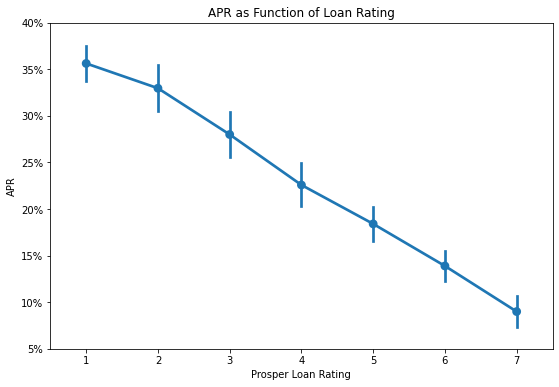

In [8]:
plt.figure(figsize=(9,6))
sb.pointplot(data=prosper2, x='ProsperRating (numeric)', y='BorrowerAPR', ci='sd')
plt.ylabel('APR')
plt.yticks(new_tix, new_labs)
plt.xlabel('Prosper Loan Rating')
plt.title('APR as Function of Loan Rating');

## Loan Characteristics and APR

* Higher loan amount was associated with a lower APR in bivariate analysis

* Median loan amount was \\$8,000; the effect on APR was only apparent for loans >\$25,000
    - loans >\$25,000 were only issued to borrowers with a loan rating >= 5
    - when stratified by loan rating, there was no difference in APR between higher and lower loan amounts
    
* Thus, loan amount did not influence APR when controlling for loan rating

In [9]:
prosper2['LoanOriginalAmount'].describe()

count    76805.000000
mean      9264.595664
std       6387.050856
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14258.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

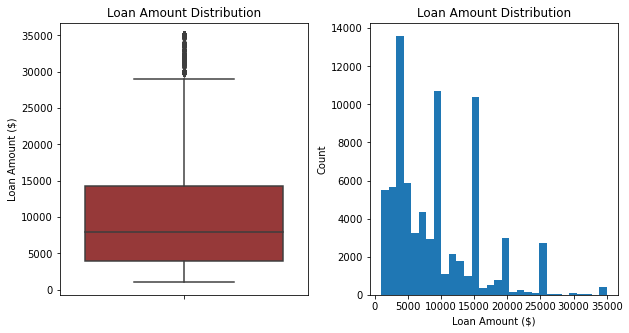

In [10]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.25)
plt.subplot(121)
sb.boxplot(data=prosper2, y='LoanOriginalAmount', color='brown')
plt.ylabel('Loan Amount ($)')
plt.title('Loan Amount Distribution')

plt.subplot(122)
plt.hist(data=prosper2, x='LoanOriginalAmount', bins=30)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.title('Loan Amount Distribution')
plt.show();

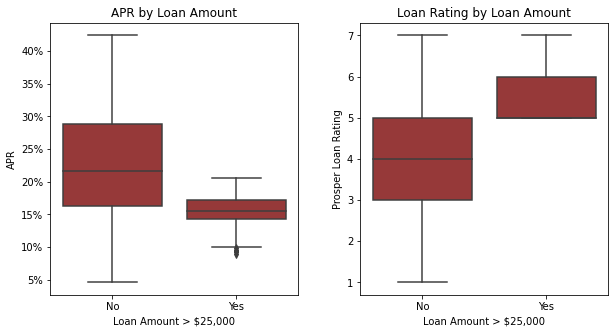

In [11]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
sb.boxplot(data=prosper2, x='LoanGT25k', y='BorrowerAPR',  color='brown')
plt.xlabel('Loan Amount > $25,000')
plt.yticks(new_tix, new_labs)
plt.ylabel('APR')
plt.title('APR by Loan Amount');

plt.subplot(122)
sb.boxplot(data=prosper2, x='LoanGT25k', y='ProsperRating (numeric)',  color='brown')
plt.xlabel('Loan Amount > $25,000')
plt.ylabel('Prosper Loan Rating')
plt.title('Loan Rating by Loan Amount');

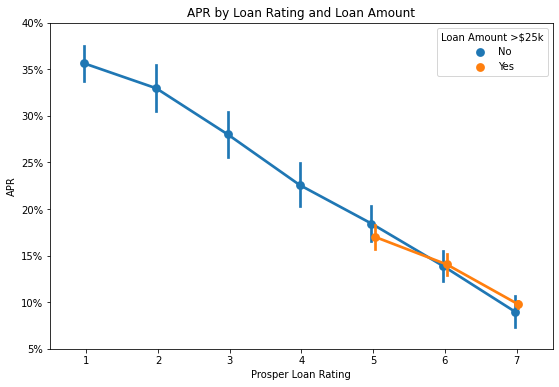

In [12]:
plt.figure(figsize=(9,6))
sb.pointplot(data=prosper2, x='ProsperRating (numeric)', y='BorrowerAPR', hue='LoanGT25k', ci='sd', dodge=True)
plt.ylabel('APR')
plt.yticks(new_tix, new_labs)
plt.xlabel('Prosper Loan Rating')
plt.title('APR by Loan Rating and Loan Amount')
plt.legend(title="Loan Amount >$25k");

## Loan Characteristics and APR

* Three variables showed minor effects on APR that vanished when stratified by loan rating:
    - debt:income ratio
    - homeowner status
    - prior Prosper loans
    
* None of the other borrower-related characteristics were associated with APR. Examples:
    - stated monthly income
    - open and current credit lines
    - credit balances

* Representative examples are shown below

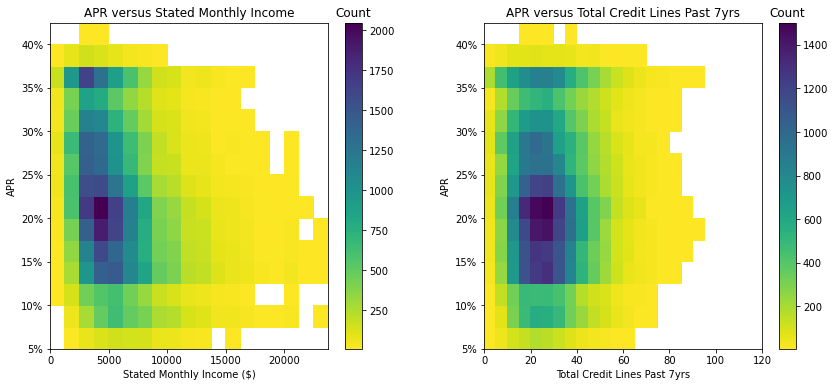

In [13]:
plt.figure(figsize=(14,6))
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
bins_x = np.arange(0, 25000, 1250)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', cmin=10, cmap='viridis_r', bins=([bins_x, bins_y]))
clb = plt.colorbar()
clb.ax.set_title('Count')
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('APR')
plt.yticks(new_tix, new_labs)
plt.title('APR versus Stated Monthly Income');

plt.subplot(122)
bins_x = np.arange(0, 125, 5)
bins_y = np.arange(0.05, 0.45, 0.025)
plt.hist2d(data=prosper2, x = 'TotalCreditLinespast7years', y = 'BorrowerAPR', cmin=5, cmap='viridis_r', bins=([bins_x, bins_y]))
clb = plt.colorbar()
clb.ax.set_title('Count')
plt.xlabel('Total Credit Lines Past 7yrs')
plt.ylabel('APR')
plt.title('APR versus Total Credit Lines Past 7yrs')
plt.yticks(new_tix, new_labs);

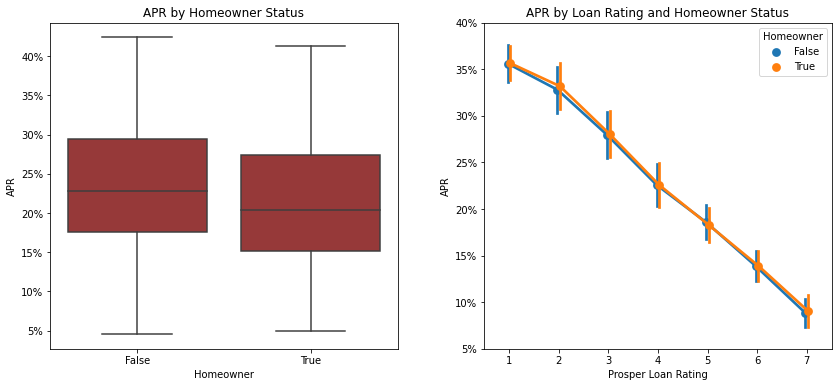

In [14]:
plt.figure(figsize=(14,6))
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
sb.boxplot(data=prosper2, x='IsBorrowerHomeowner', y='BorrowerAPR',  color='brown')
plt.xlabel('Homeowner')
plt.ylabel('APR')
plt.yticks(new_tix, new_labs)
plt.title('APR by Homeowner Status');

plt.subplot(122)
sb.pointplot(data=prosper2, x='ProsperRating (numeric)', y='BorrowerAPR', hue='IsBorrowerHomeowner', ci='sd', dodge=True)
plt.ylabel('APR')
plt.xlabel('Prosper Loan Rating')
plt.yticks(new_tix, new_labs)
plt.legend(title="Homeowner")
plt.title('APR by Loan Rating and Homeowner Status');

## How do Prosper Score and Credit Score Influence Loan Rating?

* Prosper discloses what the loan rating is comprised of, but not how it is calculated

* Since Prosper loan rating is the primary determinant of APR, it may be of interest to borrowers to know how its constituents influence it
    - At lower Prosper scores, the slope of credit score has less influence on loan rating 
    - At higher Prosper scores, the relationship appears more stepwise than linear,
    - The relationships do not appear to be completely monotonic, especially at scores 1-2. This may indicate that the formula is non-linear, or that there are additional factors included that aren't disclosed by Prosper.

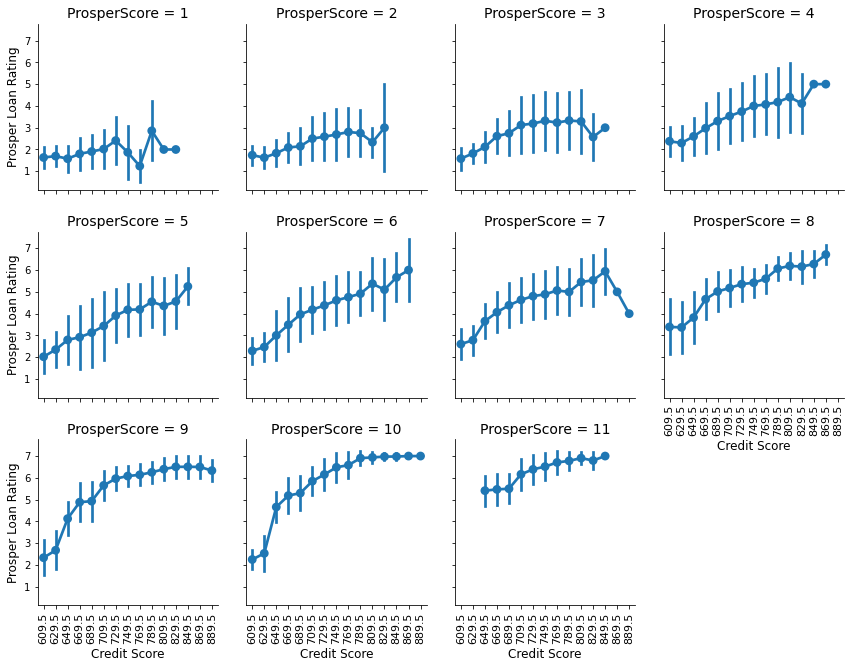

In [24]:
g = sb.FacetGrid(prosper2, size=3, col='ProsperScore', col_wrap=4)
g.map(sb.pointplot, 'CreditScoreAvg', 'ProsperRating (numeric)',order=np.arange(609.5,909.5,20), ci='sd')
g.set_xticklabels(rotation=90)
for i,ax in enumerate(g.axes.flat):
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12)
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12)
    ax.tick_params(axis='x', labelsize=11) 
    ax.tick_params(axis='y', labelsize=10) 
g.set_titles(size=14)
g.set_xlabels("Credit Score")
g.set_ylabels("Prosper Loan Rating");

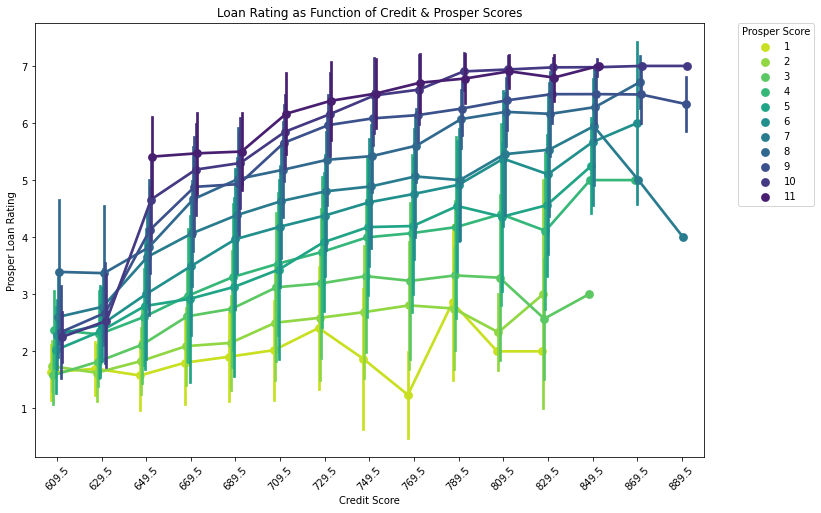

In [16]:
plt.figure(figsize=(12,8))
sb.pointplot(data=prosper2, y='ProsperRating (numeric)', x='CreditScoreAvg', hue='ProsperScore', ci='sd',\
             dodge=True, palette='viridis_r')
plt.xlabel('Credit Score')
plt.ylabel('Prosper Loan Rating')
plt.xticks(rotation=45)
plt.title('Loan Rating as Function of Credit & Prosper Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Prosper Score')
plt.show;